In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
from scipy.optimize import least_squares

In [558]:
class ITC_Simulation():
    
    def __init__(self):
        
        self.reaction = ['R + L -> RL' , 'R + R -> R2']
        self.LRratio = [1.0e-3]
        [self.LRratio.append(ele) for ele in np.linspace(0.1 , 1.4 , 1400)]
        self.Rtotal = 1.0e-3
        self.Model = {}
        self.dH = np.array([-2 , 1])
        self.ITC_curve = []
        self.L = []
        self.RL = []
        self.R2 = []
        self.R = []
        
    def model(self):
        
        self.Model['Kd1'] = 1.0 / 1.0e8
        self.Model['Kd2'] = 1.0 / 5.0e3
        
    def func(self , L):
        
        Kd1 = self.Model['Kd1']
        Kd2 = self.Model['Kd2']
        
        Ltotal = self.Ltotal
        Rtotal = self.Rtotal
        
        return eval('Rtotal - Kd1 * (self.Ltotal - L) / L - (self.Ltotal - L) - 2 * (1/Kd2) * (Kd1 * (self.Ltotal - L) / L) ** 2')
    
    def simulate(self):
        
        Kd1 = self.Model['Kd1']
        Kd2 = self.Model['Kd2']
        
        for ratio in self.LRratio:
            
            self.Ltotal = ratio * self.Rtotal
            
            L = least_squares(g.func , x0 = 0.9 * self.Ltotal, bounds = (0 , self.Ltotal) , method = 'dogbox')
            
            RL = self.Ltotal - L.x[0]
            
            R = Kd1 * RL / L.x[0]
            
            R2 = R * R / Kd2
            
            self.L.append(L.x[0] / self.Rtotal)
            self.RL.append(RL / self.Rtotal)
            self.R2.append(2 * R2 / self.Rtotal)
            self.R.append(R / self.Rtotal)
            
            print(R + RL + 2 * R2)
            
            if ratio == self.LRratio[0]:
                
                old_molefraction = [RL / self.Rtotal , 2 * R2 / self.Rtotal]
                continue
            
            new_molefraction = [RL / self.Rtotal , 2 * R2 / self.Rtotal]
            
            diff = []
            
            for i in range(len(old_molefraction)):
                
                diff.append(new_molefraction[i] - old_molefraction[i])
            
            diff = np.array(diff)
            
            print(diff , self.dH , np.dot(diff , self.dH.T))
            
            self.ITC_curve.append(np.dot(diff , self.dH.T))
            
            old_molefraction = [ele for ele in new_molefraction]
            
    def display(self):
        
        plt.figure(dpi = 150)
        plt.plot(self.LRratio[2:] , self.ITC_curve[1:])
        plt.xlabel("Ratio L:R")
        plt.ylabel("Heat released")   
    
    

In [559]:
g = ITC_Simulation()

In [560]:
g.model()

In [561]:
g.simulate()

<string>:1: RuntimeWarning: divide by zero encountered in true_divide


0.0009999995169586375
0.0009999999794315672
[ 0.0989961  -0.08313448] [-2  1] -0.2811266842066743
0.0009999999815694196
[ 0.0009292 -0.0007764] [-2  1] -0.002634789886993366
0.00099999998837363
[ 0.0009292  -0.00077632] [-2  1] -0.002634709011291203
0.0010000000118197995
[ 0.0009292  -0.00077623] [-2  1] -0.0026346180165982835
0.0009999999956937602
[ 0.0009292  -0.00077618] [-2  1] -0.002634573862964229
0.0010000000078237805
[ 0.0009292  -0.00077608] [-2  1] -0.0026344729337174355
0.0010000000111630033
[ 0.0009292  -0.00077601] [-2  1] -0.002634402831939886
0.0010000000156267857
[ 0.0009292  -0.00077593] [-2  1] -0.002634324330951038
0.0009999999947191336
[ 0.0009292  -0.00077588] [-2  1] -0.0026342678346514825
0.000999999992478266
[ 0.0009292  -0.00077578] [-2  1] -0.002634174448721105
0.0009999999895076081
[ 0.0009292  -0.00077571] [-2  1] -0.00263409714052501
0.0010000000090353012
[ 0.0009292  -0.00077561] [-2  1] -0.002634000325375613
0.0010000000119052782
[ 0.0009292  -0.00077554]

0.0010000000011474806
[ 0.00092919 -0.0007669 ] [-2  1] -0.0026252803339269493
0.0010000000014308967
[ 0.00092919 -0.00076681] [-2  1] -0.002625188035613568
0.0010000000017553348
[ 0.00092919 -0.00076672] [-2  1] -0.002625095579257941
0.0010000000021200442
[ 0.00092919 -0.00076662] [-2  1] -0.002625002965645773
0.0010000000025224302
[ 0.00092919 -0.00076653] [-2  1] -0.002624910195846819
0.001000000002957688
[ 0.00092919 -0.00076644] [-2  1] -0.0026248172712312057
0.0010000000034184199
[ 0.00092919 -0.00076635] [-2  1] -0.0026247241934820864
0.001000000003894235
[ 0.00092919 -0.00076625] [-2  1] -0.002624630964608299
0.0010000000043713425
[ 0.00092919 -0.00076616] [-2  1] -0.002624537586952136
0.0010000000048321321
[ 0.00092919 -0.00076607] [-2  1] -0.0026244440631971178
0.001000000005254752
[ 0.00092919 -0.00076597] [-2  1] -0.0026243503963717663
0.0010000000056126833
[ 0.00092919 -0.00076588] [-2  1] -0.0026242565898496606
0.0010000000058743184
[ 0.00092919 -0.00076578] [-2  1] -0.00

0.000999999994288456
[ 0.00092918 -0.00075628] [-2  1] -0.002614639814386699
0.0009999999938445445
[ 0.00092918 -0.00075616] [-2  1] -0.002614528206027422
0.000999999993372296
[ 0.00092918 -0.00075605] [-2  1] -0.002614416382405227
0.0009999999928703312
[ 0.00092918 -0.00075594] [-2  1] -0.002614304342855922
0.0009999999923372314
[ 0.00092918 -0.00075583] [-2  1] -0.002614192086708267
0.0009999999917715335
[ 0.00092918 -0.00075572] [-2  1] -0.002614079613289244
0.0009999999911717338
[ 0.00092918 -0.0007556 ] [-2  1] -0.002613966921923949
0.0009999999905362868
[ 0.00092918 -0.00075549] [-2  1] -0.002613854011931982
0.0009999999898636053
[ 0.00092918 -0.00075538] [-2  1] -0.0026137408826309994
0.0009999999891520603
[ 0.00092918 -0.00075527] [-2  1] -0.0026136275333337733
0.0009999999958305139
[ 0.00092918 -0.00075515] [-2  1] -0.002613507925220915
0.0009999999955256932
[ 0.00092918 -0.00075504] [-2  1] -0.0026133997751867644
0.0009999999952025704
[ 0.00092918 -0.00075492] [-2  1] -0.0026

0.0009999999934282254
[ 0.00092917 -0.0007431 ] [-2  1] -0.0026014443795669973
0.0009999999932077436
[ 0.00092917 -0.00074297] [-2  1] -0.0026013108252509465
0.0009999999929827693
[ 0.00092917 -0.00074283] [-2  1] -0.0026011713393029323
0.0009999999927533408
[ 0.00092917 -0.00074269] [-2  1] -0.0026010315395911254
0.0009999999925195046
[ 0.00092917 -0.00074255] [-2  1] -0.00260089142493225
0.000999999992281315
[ 0.00092917 -0.00074241] [-2  1] -0.002600750994134593
0.0009999999920388357
[ 0.00092917 -0.00074227] [-2  1] -0.002600610246001056
0.0009999999917921381
[ 0.00092917 -0.00074213] [-2  1] -0.002600469179327325
0.0009999999915413027
[ 0.00092917 -0.00074199] [-2  1] -0.0026003277929046442
0.0009999999912864198
[ 0.00092917 -0.00074185] [-2  1] -0.002600186085513878
0.00099999999102759
[ 0.00092917 -0.00074171] [-2  1] -0.002600044055932116
0.0009999999907649238
[ 0.00092917 -0.00074156] [-2  1] -0.002599901702928009
0.0009999999904985416
[ 0.00092917 -0.00074142] [-2  1] -0.0025

0.0009999999957968075
[ 0.00092915 -0.00072585] [-2  1] -0.0025841533499817437
0.0009999999963086095
[ 0.00092915 -0.00072567] [-2  1] -0.0025839716749387343
0.0010000000042431642
[ 0.00092915 -0.00072548] [-2  1] -0.0025837836739071585
0.0010000000037187103
[ 0.00092915 -0.00072531] [-2  1] -0.002583607581688241
0.0009999999957050786
[ 0.00092915 -0.00072513] [-2  1] -0.002583430235635953
0.0009999999962402636
[ 0.00092915 -0.00072494] [-2  1] -0.0025832398807803525
0.001000000004366504
[ 0.00092915 -0.00072475] [-2  1] -0.0025830497812787123
0.0010000000038206957
[ 0.00092915 -0.00072457] [-2  1] -0.0025828718665744654
0.0009999999955352295
[ 0.00092915 -0.00072439] [-2  1] -0.0025826927188640214
0.000999999996092938
[ 0.00092915 -0.0007242 ] [-2  1] -0.0025825001413738446
0.0009999999965856472
[ 0.00092915 -0.00072402] [-2  1] -0.0025823140032170677
0.0010000000040241482
[ 0.00092915 -0.00072382] [-2  1] -0.0025821218968898885
0.001000000003519157
[ 0.00092915 -0.00072364] [-2  1] -

0.0010000000017536224
[ 0.00092912 -0.00070193] [-2  1] -0.00256016725772254
0.0010000000016001699
[ 0.00092912 -0.00070168] [-2  1] -0.0025599132855395335
0.0009999999972708515
[ 0.00092912 -0.00070143] [-2  1] -0.002559661622511533
0.0009999999975028125
[ 0.00092912 -0.00070117] [-2  1] -0.002559402507494063
0.0009999999977155782
[ 0.00092912 -0.00070091] [-2  1] -0.002559145987793582
0.000999999997910697
[ 0.00092912 -0.00070066] [-2  1] -0.002558888599569653
0.0009999999980895957
[ 0.00092911 -0.0007004 ] [-2  1] -0.002558630338012541
0.0009999999982535882
[ 0.00092911 -0.00070014] [-2  1] -0.0025583711982673785
0.0009999999984038842
[ 0.00092911 -0.00069988] [-2  1] -0.002558111175434724
0.0009999999985415985
[ 0.00092911 -0.00069962] [-2  1] -0.002557850264566147
0.0010000000025553776
[ 0.00092911 -0.00069936] [-2  1] -0.0025575855356300414
0.0010000000023412624
[ 0.00092911 -0.0006991 ] [-2  1] -0.0025573260077506876
0.001000000002144551
[ 0.00092911 -0.00069884] [-2  1] -0.0025

0.001000000001181784
[ 0.00092905 -0.00066732] [-2  1] -0.0025254196170143295
0.0010000000010560995
[ 0.00092905 -0.00066694] [-2  1] -0.00252503025043041
0.001000000000941483
[ 0.00092905 -0.00066655] [-2  1] -0.002524639143080598
0.0010000000008370787
[ 0.00092905 -0.00066616] [-2  1] -0.002524246281876502
0.0010000000007420902
[ 0.00092904 -0.00066576] [-2  1] -0.0025238516535993905
0.0010000000006557769
[ 0.00092904 -0.00066537] [-2  1] -0.0025234552448927805
0.0009999999984085903
[ 0.00092904 -0.00066497] [-2  1] -0.00252305859342436
0.000999999998599114
[ 0.00092904 -0.00066457] [-2  1] -0.0025226568442164865
0.0009999999987722963
[ 0.00092904 -0.00066417] [-2  1] -0.002522255030117382
0.0009999999989294785
[ 0.00092904 -0.00066377] [-2  1] -0.0025218513793750508
0.0009999999990719102
[ 0.00092904 -0.00066337] [-2  1] -0.002521445878015116
0.0009999999992007552
[ 0.00092904 -0.00066296] [-2  1] -0.0025210385119118217
0.000999999999317097
[ 0.00092904 -0.00066256] [-2  1] -0.00252

0.0009999999986008308
[ 0.00092885 -0.0006091 ] [-2  1] -0.0024668042802417356
0.000999999998696787
[ 0.00092885 -0.00060839] [-2  1] -0.002466089470489277
0.000999999998788688
[ 0.00092884 -0.00060768] [-2  1] -0.002465369846212234
0.0009999999988764376
[ 0.00092884 -0.00060696] [-2  1] -0.00246464535286664
0.0009999999989599821
[ 0.00092884 -0.00060624] [-2  1] -0.0024639159350372947
0.0009999999990393034
[ 0.00092883 -0.00060551] [-2  1] -0.0024631815364232063
0.0010000000039016548
[ 0.00092883 -0.00060478] [-2  1] -0.002462438988824839
0.001000000003607091
[ 0.00092883 -0.00060404] [-2  1] -0.0024616978081675456
0.0010000000033277977
[ 0.00092882 -0.0006033 ] [-2  1] -0.002460948107116362
0.0010000000030636292
[ 0.00092882 -0.00060255] [-2  1] -0.0024601931910130242
0.0010000000028143614
[ 0.00092882 -0.0006018 ] [-2  1] -0.002459432998890676
0.0010000000026151134
[ 0.00092881 -0.00060104] [-2  1] -0.002458667445896609
0.0010000000024362576
[ 0.00092881 -0.00060028] [-2  1] -0.0024

0.0010000000036450825
[ 0.00092765 -0.00048114] [-2  1] -0.002336448477748842
0.0010000000036928351
[ 0.00092762 -0.0004792 ] [-2  1] -0.0023344344023166243
0.0010000000035915375
[ 0.00092759 -0.00047722] [-2  1] -0.0023323924722663536
0.0010000000033828379
[ 0.00092755 -0.00047522] [-2  1] -0.0023303220246704524
0.0010000000031015555
[ 0.00092751 -0.00047319] [-2  1] -0.0023282223727427755
0.0010000000027762853
[ 0.00092748 -0.00047114] [-2  1] -0.002326092804685445
0.0010000000024300345
[ 0.00092744 -0.00046906] [-2  1] -0.0023239325824836628
0.0010000000020808648
[ 0.0009274  -0.00046694] [-2  1] -0.002321740940636252
0.0009999999827292804
[ 0.00092736 -0.00046481] [-2  1] -0.0023195265048808825
0.000999999985714146
[ 0.00092731 -0.00046263] [-2  1] -0.002317258515936761
0.0009999999884864556
[ 0.00092727 -0.00046043] [-2  1] -0.0023149678602466424
0.000999999990994898
[ 0.00092722 -0.0004582 ] [-2  1] -0.002312642445641014
0.0009999999932078594
[ 0.00092717 -0.00045593] [-2  1] -0.

[ 3.41035851e-06 -1.30175997e-08] [-2  1] -6.833734622256556e-06
0.0010000000019495707
[ 3.29273409e-06 -1.23503208e-08] [-2  1] -6.597818503594068e-06
0.0010000000017834666
[ 3.18107095e-06 -1.17277814e-08] [-2  1] -6.373869672482721e-06
0.0010000000016338704
[ 3.07497430e-06 -1.11463017e-08] [-2  1] -6.161094911395292e-06
0.001000000001498913
[ 2.97408145e-06 -1.06025585e-08] [-2  1] -5.958765450976464e-06
0.00100000000137696
[ 2.87805861e-06 -1.00935456e-08] [-2  1] -5.766210769165831e-06
0.0010000000012665852
[ 2.78659830e-06 -9.61653911e-09] [-2  1] -5.5828131446548034e-06
0.0010000000011665341
[ 2.69941683e-06 -9.16906695e-09] [-2  1] -5.408002726188756e-06
0.0010000000010757007
[ 2.61625215e-06 -8.74888235e-09] [-2  1] -5.241253181528874e-06
0.0010000000009931236
[ 2.53686194e-06 -8.35394019e-09] [-2  1] -5.082077813005704e-06
0.0010000000009179413
[ 2.46102179e-06 -7.98237623e-09] [-2  1] -4.930025954503753e-06
0.0010000000008494006
[ 2.38852372e-06 -7.63248879e-09] [-2  1] -4.

0.0010000000000075957
[ 4.10202147e-07 -5.44123841e-10] [-2  1] -8.209484172303772e-07
0.0010000000000073383
[ 4.05186810e-07 -5.34180338e-10] [-2  1] -8.109078005456589e-07
0.0010000000000070903
[ 4.00262854e-07 -5.24477579e-10] [-2  1] -8.010501855236787e-07
0.001000000000006852
[ 3.95428075e-07 -5.15008326e-10] [-2  1] -7.91371157561018e-07
0.0010000000000066228
[ 3.90680332e-07 -5.05765597e-10] [-2  1] -7.818664286572861e-07
0.0010000000000064025
[ 3.86017549e-07 -4.96742662e-10] [-2  1] -7.72531841401124e-07
0.0010000000000061906
[ 3.81437714e-07 -4.87933026e-10] [-2  1] -7.633633607442686e-07
0.0010000000000059866
[ 3.76938869e-07 -4.79330427e-10] [-2  1] -7.543570693288149e-07
0.00100000000000579
[ 3.72519119e-07 -4.70928819e-10] [-2  1] -7.455091665896888e-07
0.0010000000000056006
[ 3.68176619e-07 -4.62722368e-10] [-2  1] -7.36815960308043e-07
0.0010000000000054193
[ 3.63909583e-07 -4.54705441e-10] [-2  1] -7.282738710436458e-07
0.0010000000000052439
[ 3.59716269e-07 -4.4687260

0.001000000000000189
[ 1.22063873e-07 -8.83904124e-11] [-2  1] -2.442161357648401e-07
0.0010000000000001846
[ 1.21245974e-07 -8.75037813e-11] [-2  1] -2.425794514142569e-07
0.0010000000000001804
[ 1.20436268e-07 -8.66289679e-11] [-2  1] -2.4095916399683627e-07
0.0010000000000001765
[ 1.19634644e-07 -8.57657760e-11] [-2  1] -2.393550541583306e-07
0.0010000000000001722
[ 1.18840996e-07 -8.49140131e-11] [-2  1] -2.3776690610110253e-07
0.0010000000000001683
[ 1.18055219e-07 -8.40734909e-11] [-2  1] -2.3619451158083742e-07
0.0010000000000001644
[ 1.17277209e-07 -8.32440245e-11] [-2  1] -2.346376610246722e-07
0.0010000000000001607
[ 1.16506863e-07 -8.24254327e-11] [-2  1] -2.3309615063653695e-07
0.0010000000000001566
[ 1.15744081e-07 -8.16175380e-11] [-2  1] -2.315697790664031e-07
0.0010000000000001533
[ 1.14988765e-07 -8.08201661e-11] [-2  1] -2.300583509629157e-07
0.0010000000000001496
[ 1.14240818e-07 -8.00331464e-11] [-2  1] -2.2856166875766498e-07
0.0010000000000001462
[ 1.13500143e-07 

0.0010000000000000109
[ 6.40477827e-08 -3.36044456e-11] [-2  1] -1.2812916993365334e-07
0.0010000000000000104
[ 6.37364551e-08 -3.33597817e-11] [-2  1] -1.275062700091399e-07
0.0010000000000000102
[ 6.34273918e-08 -3.31174871e-11] [-2  1] -1.2688790105358325e-07
0.0010000000000000102
[ 6.31205713e-08 -3.28775332e-11] [-2  1] -1.2627402018376655e-07
0.0010000000000000096
[ 6.28159708e-08 -3.26398917e-11] [-2  1] -1.2566458140826212e-07
0.0010000000000000093
[ 6.25135702e-08 -3.24045348e-11] [-2  1] -1.2505954495329762e-07
0.0010000000000000087
[ 6.22133476e-08 -3.21714352e-11] [-2  1] -1.2445886660460842e-07
0.0010000000000000085
[ 6.19152830e-08 -3.19405658e-11] [-2  1] -1.23862506589215e-07
0.0010000000000000083
[ 6.16193546e-08 -3.17119001e-11] [-2  1] -1.232704211377215e-07
0.0010000000000000083
[ 6.13255431e-08 -3.14854119e-11] [-2  1] -1.2268257158813785e-07
0.0010000000000000078
[ 6.10338273e-08 -3.12610752e-11] [-2  1] -1.2209891572613418e-07
0.0010000000000000074
[ 6.07441883e-

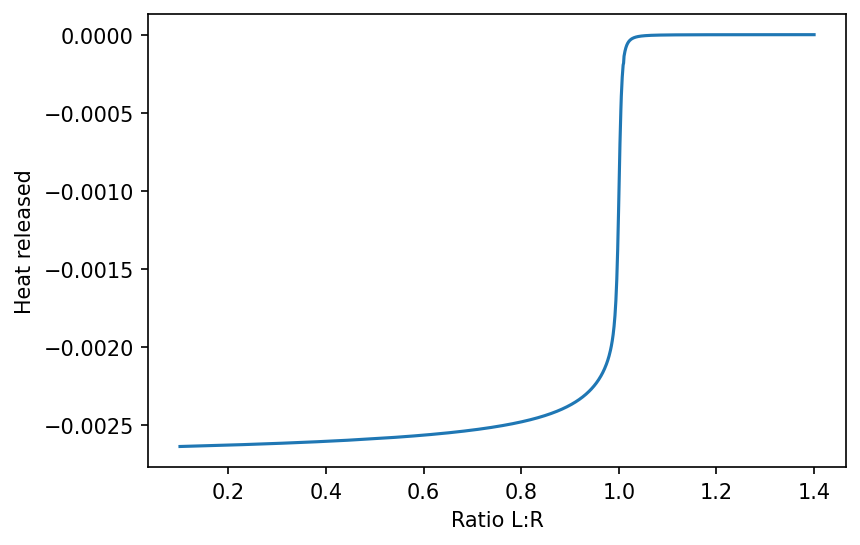

In [547]:
g.display()

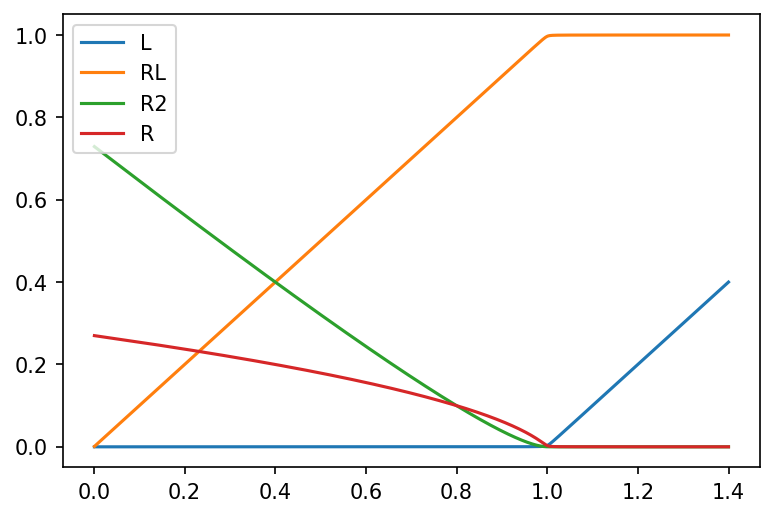

In [537]:
plt.figure(dpi = 150)
plt.plot(g.LRratio , g.L , label = 'L')
plt.plot(g.LRratio , g.RL , label = "RL")
plt.plot(g.LRratio , g.R2 , label = 'R2')
plt.plot(g.LRratio , g.R , label = 'R')
plt.legend()

In [532]:
0.0989961 * 2 + 0.08313448

0.28112668

In [548]:
def func(L):
    
    global Ltotal
    
    return eval('(Rtotal - Kd1 * (Ltotal - L) / L - (Ltotal - L) - 2 * (1/Kd2) * (Kd1 * (Ltotal - L) / L) ** 2)')

In [549]:
Rtotal = 1.0e-3 
LRratio = [1.0e-3]
[LRratio.append(ele) for ele in np.linspace(0.1 , 1.4 , 14)]

Kd1 = 1.0 / 1.0e8
Kd2 = 1.0 / 5.0e3

lst = list()

for ele in LRratio:
    
    Ltotal = Rtotal * ele
    
    L = Symbol('L')
    
    ans = least_squares(func , x0 = 0.9 * Ltotal, bounds = (0 , Ltotal) , method = 'trf')

    #ans = solve(Rtotal - Kd1 * (Ltotal - L) / L - (Ltotal - L) - 2 * (1/Kd2) * (Kd1 * (Ltotal - L) / L) ** 2 )
    
    print(ans.x)
    
    lst.append(ans.x)

[9.e-07]
[7.50085635e-06]
[9.13949933e-07]
[4.2313546e-06]
[1.21099749e-05]
[1.28018738e-06]
[4.814804e-06]
[1.39388486e-05]
[3.27743771e-05]
[1.84295997e-05]
[5.63043808e-05]
[0.0001223]
[0.00020789]
[0.00030267]
[0.00041979]


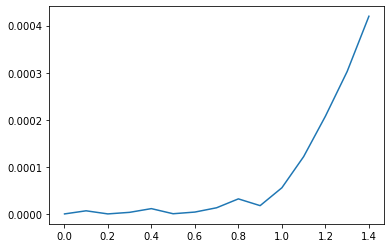

In [550]:
plt.plot(LRratio , lst)

In [553]:
x = Symbol('x')
solve(x - 2)

[2]